In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("sales_advertising.csv")

In [18]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,12.0
3,3,151.5,41.3,58.5,16.5
4,4,180.8,10.8,58.4,17.9


In [19]:
df.drop(columns=["Unnamed: 0"], inplace= True)

In [20]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [24]:
import seaborn as sns

<Axes: ylabel='Newspaper'>

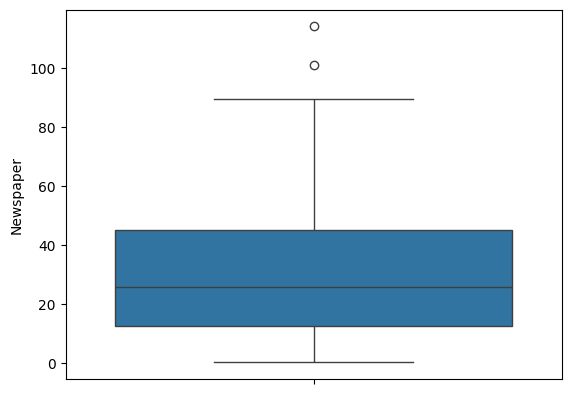

In [28]:
sns.boxplot(df["Newspaper"])

In [30]:
df["Newspaper"].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [32]:
q1 = df.describe()["Newspaper"]["25%"]

In [33]:
q3 = df.describe()["Newspaper"]["75%"]

In [34]:
q1

np.float64(12.75)

In [35]:
q3

np.float64(45.1)

In [36]:
iqr = q3 - q1

In [37]:
iqr

np.float64(32.35)

In [38]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [39]:
lower_limit

np.float64(-35.775000000000006)

In [40]:
upper_limit

np.float64(93.625)

In [46]:
# fillna function used to fill the missing values

In [45]:
# clip fucntion is ued to remove the outliers.

In [43]:
df["Newspaper"] = df["Newspaper"].clip(lower_limit, upper_limit)

<Axes: ylabel='Newspaper'>

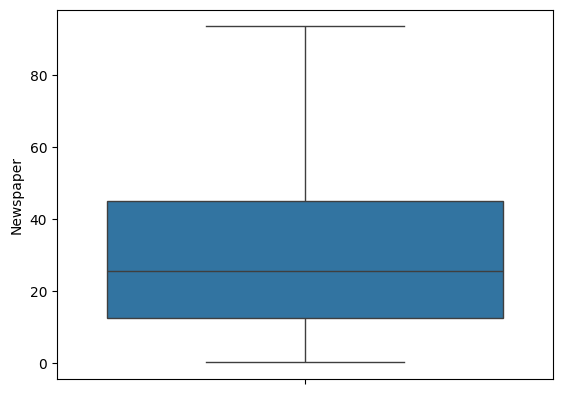

In [44]:
sns.boxplot(df["Newspaper"])

In [47]:
# Encoding --> conveting the categorical info into numerical

In [48]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [49]:
# Trainig

In [52]:
x = df.drop(columns=["Sales"])
y = df["Sales"]

In [53]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [54]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [57]:
x.shape

(200, 3)

In [56]:
x_train.shape

(160, 3)

In [58]:
x_test.shape

(40, 3)

In [59]:
# Training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
# y_pred

In [64]:
y_pred = lr.predict(x_test)

In [66]:
# Evalutaiton comparion mse,  --> linear

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mse = mean_squared_error(y_test,y_pred)

In [69]:
mse

np.float64(4.520715317369826)

In [70]:
import numpy as np

In [71]:
rmse = np.sqrt(mse)

In [72]:
rmse

np.float64(2.12619738438599)

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [76]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
y_pred1 = dtr.predict(x_test)

In [84]:
from sklearn.metrics import precision_score

In [81]:
y_test.shape

(40,)

In [82]:
y_pred1.shape

(40,)

In [86]:
import joblib
joblib.dump(lr, "Sales.pkl")

['Sales.pkl']

In [87]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
